In [1]:
# Import the required libraries and dependencies


from pathlib import Path
import pandas as pd
import opendatasets as od
import numpy as np
import datetime as dt
import os
import requests
from bokeh.models.formatters import NumeralTickFormatter


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.pandas

import warnings
warnings.filterwarnings('ignore')

### Loading Data from DataSource

In [2]:
# download data from Kaggle
od.download("https://www.kaggle.com/datasets/sriharshaeedala/airline-delay")

Skipping, found downloaded files in ".\airline-delay" (use force=True to force download)


In [3]:
# reading the csv file & dropping the unnecessary columns
file =('airline-delay/Airline_Delay_Cause.csv')
csv_data = (pd.read_csv(file)).drop(columns=['carrier','arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'])

#### Data Cleaning & Preperation from 2018 to 2022 to create Dataframe for Performance and Root Cause Analysis

In [4]:
# Slicing yearly data from 2018 to 2022 & dropping null values
airport_yearly_data=csv_data[csv_data["year"].isin([2018,2019,2020,2021,2022])].dropna()
airport_yearly_data.reset_index()

# adding two new columns to the dataframe %_on_time_arrivals & %_delayed_flights
airport_yearly_data["%_on_time_arrivals"]=round(((airport_yearly_data["arr_flights"]-airport_yearly_data["arr_del15"]) / airport_yearly_data["arr_flights"])*100,2)
airport_yearly_data["%_delayed_flight"]=round((airport_yearly_data["arr_del15"]/airport_yearly_data["arr_flights"])*100,2)


# Review the first and last five rows of the DataFrame
display(airport_yearly_data.head())
display(airport_yearly_data.tail())

,year,month,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,%_on_time_arrivals,%_delayed_flight
12373,2022,12,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",27.0,7.0,4.37,0.00,2.10,0.0,0.53,0.0,0.0,74.07,25.93
12374,2022,12,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",69.0,3.0,0.61,0.00,0.02,0.0,2.37,0.0,0.0,95.65,4.35
12375,2022,12,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,14.0,5.28,4.34,3.42,0.0,0.96,0.0,2.0,77.42,22.58
12376,2022,12,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",47.0,10.0,5.12,0.57,1.00,1.0,2.31,0.0,0.0,78.72,21.28
12377,2022,12,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",131.0,34.0,12.08,2.70,6.32,0.0,12.90,7.0,0.0,74.05,25.95


,year,month,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,%_on_time_arrivals,%_delayed_flight
112685,2018,1,Republic Airline,STL,"St. Louis, MO: St Louis Lambert International",258.0,38.0,10.07,0.62,10.28,0.0,17.03,7.0,0.0,85.27,14.73
112686,2018,1,Republic Airline,SYR,"Syracuse, NY: Syracuse Hancock International",114.0,27.0,11.17,0.32,5.48,0.0,10.03,5.0,0.0,76.32,23.68
112687,2018,1,Republic Airline,TUL,"Tulsa, OK: Tulsa International",67.0,5.0,0.47,0.41,0.84,0.0,3.28,2.0,0.0,92.54,7.46
112688,2018,1,Republic Airline,TVC,"Traverse City, MI: Cherry Capital",25.0,3.0,0.54,0.88,1.03,0.0,0.55,0.0,0.0,88.00,12.00
112689,2018,1,Republic Airline,XNA,"Fayetteville, AR: Northwest Arkansas National",140.0,21.0,4.37,2.19,4.82,0.0,9.62,7.0,0.0,85.00,15.00


In [5]:
airport_yearly_data.shape

(99977, 16)

In [6]:
airport_yearly_data.isnull().sum()

year                  0
month                 0
carrier_name          0
airport               0
airport_name          0
arr_flights           0
arr_del15             0
carrier_ct            0
weather_ct            0
nas_ct                0
security_ct           0
late_aircraft_ct      0
arr_cancelled         0
arr_diverted          0
%_on_time_arrivals    0
%_delayed_flight      0
dtype: int64

In [7]:
airport_yearly_data.dtypes

year                    int64
month                   int64
carrier_name           object
airport                object
airport_name           object
arr_flights           float64
arr_del15             float64
carrier_ct            float64
weather_ct            float64
nas_ct                float64
security_ct           float64
late_aircraft_ct      float64
arr_cancelled         float64
arr_diverted          float64
%_on_time_arrivals    float64
%_delayed_flight      float64
dtype: object

In [8]:
csv_data.columns

Index(['year', 'month', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted'],
      dtype='object')

## Descriptive Analysis

In [9]:
airport_yearly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,99977.0,2019.992738,1.424737,2018.0,2019.00,2020.00,2021.00,2022.00
month,99977.0,6.506857,3.461998,1.0,3.00,7.00,10.00,12.00
arr_flights,99977.0,320.464637,904.941414,1.0,40.00,88.00,215.00,21931.00
arr_del15,99977.0,55.617482,158.548514,0.0,5.00,14.00,38.00,4176.00
carrier_ct,99977.0,18.306015,47.632229,0.0,1.89,5.20,14.23,1147.00
weather_ct,99977.0,2.080214,7.058948,0.0,0.00,0.29,1.74,226.00
nas_ct,99977.0,16.003526,54.786650,0.0,0.84,3.07,9.34,1884.42
security_ct,99977.0,0.156214,0.756266,0.0,0.00,0.00,0.00,58.69
late_aircraft_ct,99977.0,19.071557,61.057709,0.0,1.00,3.85,12.02,1537.66
arr_cancelled,99977.0,8.150305,51.757889,0.0,0.00,1.00,4.00,4951.00


In [10]:
# No of airport reported

airport_count=airport_yearly_data["airport"].nunique()
print(f" No of reported airports {airport_count}")

 No of reported airports 382


In [11]:
# carriers and their flights
no_of_carriers=airport_yearly_data.groupby("carrier_name")["arr_flights"].sum().sort_values(ascending=False)
no_of_carriers

carrier_name
Southwest Airlines Co.      6049563.0
Delta Air Lines Inc.        4163519.0
American Airlines Inc.      4043887.0
SkyWest Airlines Inc.       3694528.0
United Air Lines Inc.       2628962.0
Republic Airline            1514556.0
Envoy Air                   1337927.0
JetBlue Airways             1222321.0
Endeavor Air Inc.           1212854.0
PSA Airlines Inc.           1197372.0
Alaska Airlines Inc.        1066141.0
Spirit Air Lines             939606.0
Mesa Airlines Inc.           853785.0
Frontier Airlines Inc.       639348.0
Allegiant Air                531766.0
Hawaiian Airlines Inc.       335194.0
ExpressJet Airlines Inc.     240466.0
Horizon Air                  200419.0
ExpressJet Airlines LLC      149209.0
Virgin America                17670.0
Name: arr_flights, dtype: float64

# **Exploratory Data Analysis**

In [12]:
# grouping data by year from airport_yearly_data to plot yearly trend of Total arrivals and delays
volume_yearly_group=airport_yearly_data[["year","arr_flights","arr_del15"]].groupby("year").sum()

formatter = NumeralTickFormatter(format="0,0")

# using hv line plot to plot to show trend
linechart_yearly=volume_yearly_group.hvplot(xlabel="Year",ylabel="Total Flight/ Flight Delayed"
                ,label="PATTERN OF FLIGHTS ARRIVING AND FLIGHTS DELAYED 2018-2022",width=600,color=["teal","red"]
                                         ,hover_color='yellow').opts(yformatter=formatter)

#using hv bar plot to display proportionateof delays to total arrivals

barchart_yearly=volume_yearly_group.hvplot.barh(y=["arr_del15","arr_flights"],xlabel="Year",ylabel="Total Flight/ Flight Delayed"
                ,label="FLIGHT OPERATIONS COMPARED TO DELAY, 2018-2022",color=["red","teal"],stacked=True
                                               ,width=500,hover_color='yellow').opts(xformatter=formatter)

# displaying resulted charts
combined_chart= linechart_yearly   +   barchart_yearly
combined_chart

:Layout
   .NdOverlay.PATTERN_OF_FLIGHTS_ARRIVING_AND_FLIGHTS_DELAYED_2018_hyphen_minus_2022 :NdOverlay   [Variable]
      :Curve   [year]   (value)
   .Bars.FLIGHT_OPERATIONS_COMPARED_TO_DELAY_comma_2018_hyphen_minus_2022            :Bars   [year,Variable]   (value)

### Total Amount of the Flight Delayed

In [13]:
total_flights_delayed= airport_yearly_data["arr_del15"].sum()
total_flights_cancelled_diverted=airport_yearly_data["arr_cancelled"].sum() + airport_yearly_data["arr_diverted"].sum()
percentage_flight_delayed=total_flights_delayed/(airport_yearly_data["arr_flights"].sum())*100
percentage_flight_cancelled_diverted=total_flights_cancelled_diverted/(airport_yearly_data["arr_flights"].sum())*100

print("----------------------------------------------------------------------------")
print(f" Total Flights arrived between 2018-2022 {airport_yearly_data['arr_flights'].sum()}")
print(f" Percentage of delayed flights is {round(percentage_flight_delayed)}%  & in numbers is around {total_flights_delayed:,}\n")
print(f" Percentage of cancelled/diverted flights is {round(percentage_flight_cancelled_diverted)}%  & in numbers is around {total_flights_cancelled_diverted:,}\n")
print("----------------------------------------------------------------------------")

----------------------------------------------------------------------------
 Total Flights arrived between 2018-2022 32039093.0
 Percentage of delayed flights is 17%  & in numbers is around 5,560,469.0

 Percentage of cancelled/diverted flights is 3%  & in numbers is around 889,238.0

----------------------------------------------------------------------------


## **Interactive Chart for Arrival Statistics of Each Airport**

In [14]:
# function 'airport_statictics' defined to display interactive pie chart based upon user input for airport code and options to display

def airport_statistics(airport_name,options):
    
    #if user entered ALL airports and on_time performance
    if (airport_name=="ALL") & (options=="on_time"): 
        x=airport_name
        on_time=(airport_yearly_data["arr_flights"]-airport_yearly_data["arr_del15"]).sum()/airport_yearly_data["arr_flights"].sum()*100
        delayed=airport_yearly_data["arr_del15"].sum()/airport_yearly_data["arr_flights"].sum()*100
        cancelled=airport_yearly_data["arr_cancelled"].sum()/airport_yearly_data["arr_flights"].sum()*100
        diverted=airport_yearly_data["arr_diverted"].sum()/airport_yearly_data["arr_flights"].sum()*100

         #defined labels and values for pie chart
        data={'Category':["On_time","Delayed","Cancelled","Diverted"],
        'Values': [on_time,delayed,cancelled,diverted]}

        df = pd.DataFrame(data)

       # Plotting the pie chart
        fig, ax = plt.subplots(figsize=(4, 4))
        wedges, texts, autotexts = ax.pie(df['Values'],autopct='%1.1f%%')

         # Hide the autopct labels
        for autotext in autotexts:
            autotext.set_visible(False)
    
       # Create custom labels for the legend with percentage
        labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(df['Category'], df['Values']/df['Values'].sum()*100)]

      # Set the title and legend
        ax.set_title(f'ON TIME ARRIVAL PERFORMANCE FOR "{x}" AIRPORT 2018-2022')
        ax.legend(wedges, labels, title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        
     
    
    #if user entered ALL airports and dealyed statistics
        
    elif (airport_name =="ALL") & (options=="delay"):
        
        x=airport_name
        on_time=(airport_yearly_data["arr_flights"]-airport_yearly_data["arr_del15"]).sum()/airport_yearly_data["arr_flights"].sum()*100
        carrier_ct=airport_yearly_data["carrier_ct"].sum()/airport_yearly_data["arr_flights"].sum()*100
        weather_ct=airport_yearly_data["weather_ct"].sum()/airport_yearly_data["arr_flights"].sum()*100
        nas_ct=airport_yearly_data["nas_ct"].sum()/airport_yearly_data["arr_flights"].sum()*100
        security_ct=airport_yearly_data["security_ct"].sum()/airport_yearly_data["arr_flights"].sum()*100
        late_aircraft_ct=airport_yearly_data["late_aircraft_ct"].sum()/airport_yearly_data["arr_flights"].sum()*100
        cancelled=airport_yearly_data["arr_cancelled"].sum()/airport_yearly_data["arr_flights"].sum()*100
        diverted=airport_yearly_data["arr_diverted"].sum()/airport_yearly_data["arr_flights"].sum()*100

         #defined labels and values for pie chart
        data={'Category':["On_time","Air Carrier Delay","Weather","National Aviation Delay",
                          "Security delay","Aircraft Late","Cancelled","Diverted"],
        'Values': [on_time,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,cancelled,diverted]}

        df = pd.DataFrame(data)

       # Plotting the pie chart
        fig, ax = plt.subplots(figsize=(4, 4))
        wedges, texts, autotexts = ax.pie(df['Values'],autopct='%1.1f%%')

         # Hide the autopct labels
        for autotext in autotexts:
            autotext.set_visible(False)
    
       # Create custom labels for the legend with percentage
        labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(df['Category'], df['Values']/df['Values'].sum()*100)]

      # Set the title and legend
        ax.set_title(f'ON TIME ARRIVAL PERFORMANCE FOR "{x}" AIRPORT 2018-2022')
        ax.legend(wedges, labels, title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        
        
        
        
    # if any specific airport is asked for its on time statistics
    
    elif (airport_name !="ALL") & (options=="delay"):
        x=airport_name
        data=airport_yearly_data[airport_yearly_data["airport"]==x]
        
        on_time=(data["arr_flights"]-data["arr_del15"]).sum()/data["arr_flights"].sum()*100
        carrier_ct=data["carrier_ct"].sum()/data["arr_flights"].sum()*100
        weather_ct=data["weather_ct"].sum()/data["arr_flights"].sum()*100
        nas_ct=data["nas_ct"].sum()/data["arr_flights"].sum()*100
        security_ct=data["security_ct"].sum()/data["arr_flights"].sum()*100
        late_aircraft_ct=data["late_aircraft_ct"].sum()/data["arr_flights"].sum()*100
        cancelled=data["arr_cancelled"].sum()/data["arr_flights"].sum()*100
        diverted=data["arr_diverted"].sum()/data["arr_flights"].sum()*100

         #defined labels and values for pie chart
        data={'Category':["On_time","Air Carrier Delay","Weather","National Aviation Delay",
                          "Security delay","Aircraft Late","Cancelled","Diverted"],
        'Values': [on_time,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,cancelled,diverted]}

        df = pd.DataFrame(data)

       # Plotting the pie chart
        fig, ax = plt.subplots(figsize=(4, 4))
        wedges, texts, autotexts = ax.pie(df['Values'],autopct='%1.1f%%')

         # Hide the autopct labels
        for autotext in autotexts:
            autotext.set_visible(False)
    
       # Create custom labels for the legend with percentage
        labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(df['Category'], df['Values']/df['Values'].sum()*100)]

      # Set the title and legend
        ax.set_title(f'ON TIME ARRIVAL PERFORMANCE FOR "{x}" AIRPORT 2018-2022')
        ax.legend(wedges, labels, title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
       
    
    
        
    # if any specific airport is asked for delayed reasons
    
    elif(airport_name !="ALL") & (options=="on_time"):
        x=airport_name
        data=airport_yearly_data[airport_yearly_data["airport"]==x]
                                                       
        on_time=(data["arr_flights"]-data["arr_del15"]).sum()/data["arr_flights"].sum()*100
        delayed=data["arr_del15"].sum()/data["arr_flights"].sum()*100
        cancelled=data["arr_cancelled"].sum()/data["arr_flights"].sum()*100
        diverted=data["arr_diverted"].sum()/data["arr_flights"].sum()*100

         #defined labels and values for pie chart
        data={'Category':["On_time","Delayed","Cancelled","Diverted"],
        'Values': [on_time,delayed,cancelled,diverted]}

        df = pd.DataFrame(data)

       # Plotting the pie chart
        fig, ax = plt.subplots(figsize=(4, 4))
        wedges, texts, autotexts = ax.pie(df['Values'],autopct='%1.1f%%')

         # Hide the autopct labels
        for autotext in autotexts:
            autotext.set_visible(False)
    
       # Create custom labels for the legend with percentage
        labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(df['Category'], df['Values']/df['Values'].sum()*100)]

      # Set the title and legend
        ax.set_title(f'ON TIME ARRIVAL PERFORMANCE FOR "{x}" AIRPORT 2018-2022')
        ax.legend(wedges, labels, title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        
    else:
        print("Input does not match. Try Again!!!")

Enter Airport Code (3 chars) or ALL for all airports    ALL
Enter (on_time) for On Time Arrival Performance or (delay) for Flight Delays by Cause     delay


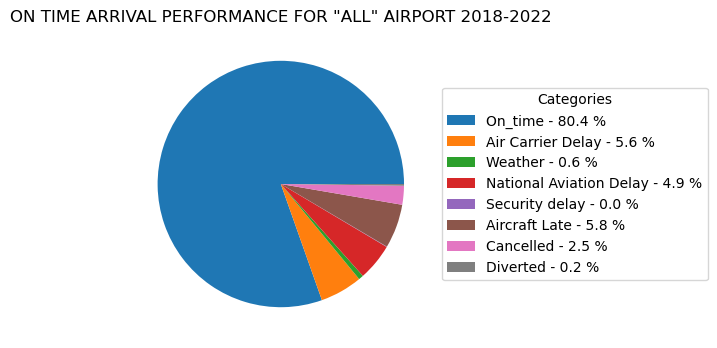

In [15]:
# User enters any specific airport code or 'All' airports to display the statistics
airport_name=input("Enter Airport Code (3 chars) or ALL for all airports   ")

# on_time arrival performance or delayed by cause
options=input("Enter (on_time) for On Time Arrival Performance or (delay) for Flight Delays by Cause    ")
airport_statistics(airport_name,options)

# **Performance Analysis Of 20 Largest Airports from 2018-2022**

In [16]:
# slicing Data Frame for 20 largest airports by total arriving flights
top_20_total_arrival_list = ["ATL","BOS","CLT","DCA","DEN","DFW","DTW","EWR","IAH","JFK","LAS","LAX","LGA","MCO",
                             "MSP","ORD","PHX","SEA","SFO","SLC","TPA"]

#creating top 20 DataFrame from the airport data
top_20_total_arrival_df=airport_yearly_data[airport_yearly_data["airport"].isin(
    ["ATL","BOS","CLT","DCA","DEN","DFW","DTW","EWR","IAH","JFK","LAS","LAX",
                                        "LGA","MCO","MSP","ORD","PHX","SEA","SFO","SLC","TPA"])]

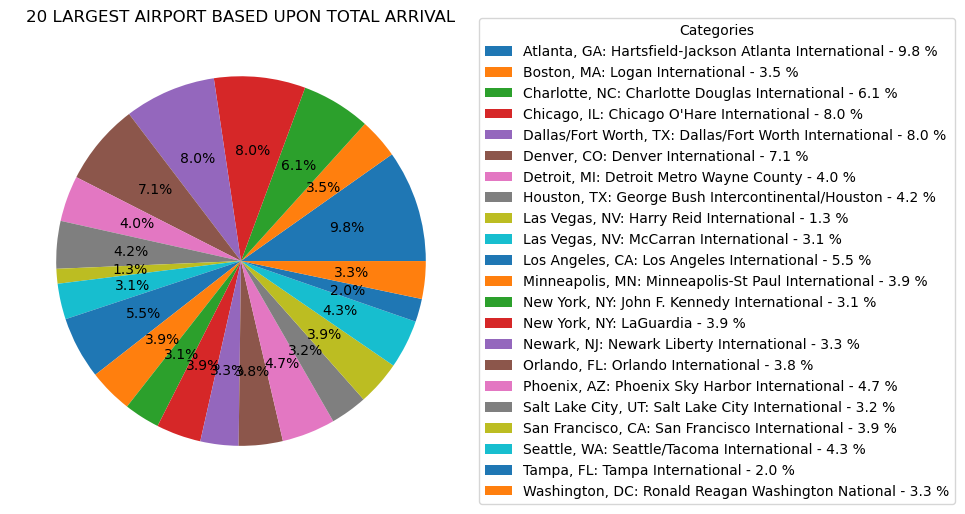

In [17]:
# Performance of Flights by top 20 airports

# grouped top 20 air ports by airport_name column
top_20_total_arrival_df_groupby=top_20_total_arrival_df.groupby("airport_name").sum()

# defined labels and values for pie chart
data={'Category':top_20_total_arrival_df_groupby.index,
   'Values': top_20_total_arrival_df_groupby.iloc[:,4]}

df = pd.DataFrame(data)

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(df['Values'],autopct='%1.1f%%')

# Hide the autopct labels
for autotext in autotexts:
    autotext.set_visible(True)
    
# Create custom labels for the legend with percentage
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(df['Category'], df['Values']/df['Values'].sum()*100)]

# Set the title and legend
ax.set_title('20 LARGEST AIRPORT BASED UPON TOTAL ARRIVAL')
ax.legend(wedges, labels, title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [18]:
# setting the dataframe of top 20 airports grouped by airports to draw bar plot

top_20_total_arrival_df_bar_plot=top_20_total_arrival_df.groupby("airport").sum()


top_20_total_arrival_df_bar_plot.hvplot.bar(x="airport",y=["arr_del15","arr_flights"
                    ],xlabel="Airport",ylabel="Total Flight/ Flight Delayed"
                       ,label="FLIGHT STATISTICS TOP 20 AIRPORTS",rot=90,stacked=True,color=["red","teal"],width=1000
                                ).opts(yformatter=formatter,hover_color='yellow',multi_level=False)

:Bars   [airport,Variable]   (value)

### Visual Aggregation For Top 20 Airports Delay by Cause

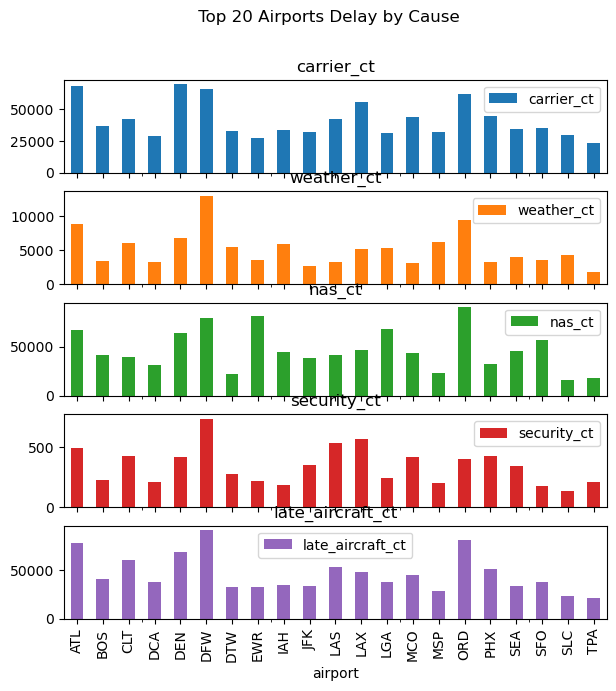

In [19]:
# Cause Delays for Top20 Airports Through 2018-2022
top_20_total_arrival_df_catplot=top_20_total_arrival_df.groupby("airport").sum()

top_20_total_arrival_df_catplot=top_20_total_arrival_df_catplot[["carrier_ct","weather_ct","nas_ct","security_ct","late_aircraft_ct"]
                                                               ].plot.bar(subplots=True,figsize=(7,7),title=" Top 20 Airports Delay by Cause")
         



### Monthly Delayed Average Pattern From 2018-2022 For Major Arriving Airports

In [20]:
top_20_total_arrival_df.columns

Index(['year', 'month', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       '%_on_time_arrivals', '%_delayed_flight'],
      dtype='object')

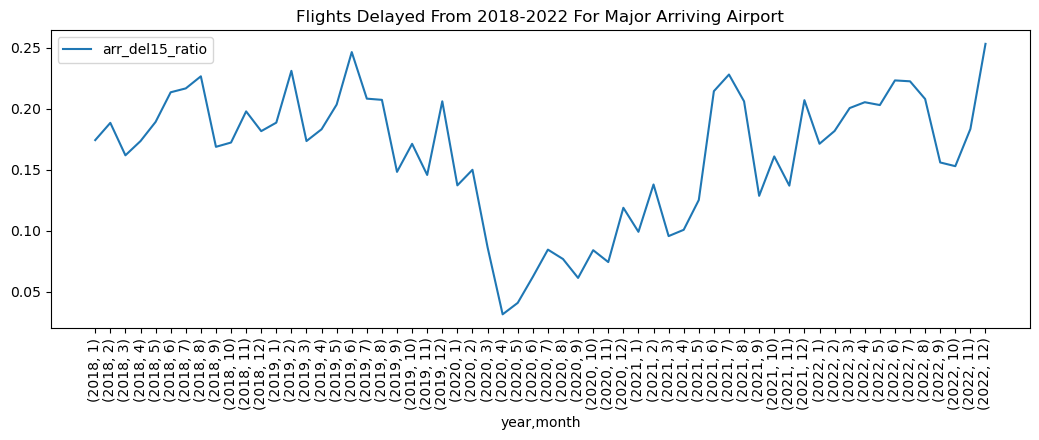

In [21]:
#Visual aggregation for Top 20 airports during 2018-2022 to display monthly Trend of Flight Delays

line_Chart1=top_20_total_arrival_df[['year','month','arr_flights','arr_del15']].groupby(["year","month"]).sum(
)

line_Chart1["arr_del15_ratio"]=line_Chart1["arr_del15"]/line_Chart1["arr_flights"]
line_Chart1=line_Chart1.drop(columns=['arr_flights','arr_del15'])

plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True
ax = line_Chart1.plot(title="Flights Delayed From 2018-2022 For Major Arriving Airport")
ax.set_xticks(range(len(line_Chart1)))
ax.set_xticklabels([item for item in line_Chart1.index.tolist()],
rotation=90,ha='center')
plt.show()

#### Months of worst delay & Possible Causes
As can be seen from chart, period of worst delays are June-August and November_December.

In [22]:
#Major delay months and causes
# monthinteger = 6 #,7,8,11,12]

# month = datetime.date(1900, monthinteger, 1).strftime('%B')

major_delay_months_list=[6,7,8,11,12]
major_delay_month_df=top_20_total_arrival_df[top_20_total_arrival_df["month"].isin(major_delay_months_list)]


major_delay_month_barchart=major_delay_month_df[['month','carrier_ct', 'weather_ct',
       'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled',
       'arr_diverted']].groupby('month').sum(
).hvplot.bar(xlabel="Months of Worst Delays\n 6= June, 7=July,  8=August,  11=November,  12=December",
             ylabel="Flights Delayed",title="Cause Attribution to Months Of Worst Delay",width=1000,height=500,stacked=True
            ).opts(yformatter=formatter,multi_level=False)
major_delay_month_barchart


:Bars   [month,Variable]   (value)

### List of Most Delayed Airports

In [23]:

#create a numerical aggregation by grouping the data by airport and finding maximum delayed airports
top_delaying_airport=top_20_total_arrival_df.groupby(["airport"]).sum()
top_delaying_airport=top_delaying_airport.nlargest(10,"arr_del15").drop(columns=["year","month","carrier_name"]
                                                                      ).sort_values("arr_del15",ascending=False)
top_delaying_airport

,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,%_on_time_arrivals,%_delayed_flight
airport,,,,,,,,,,,,
DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",1366486.0,249446.0,65498.09,12999.08,79696.99,739.82,90512.03,43437.0,5422.0,60400.02,14599.98
ORD,"Chicago, IL: Chicago O'Hare InternationalChica...",1363620.0,242854.0,61872.67,9442.16,90361.13,398.77,80779.32,42752.0,3357.0,61758.65,14041.35
ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1671588.0,221182.0,67659.14,8876.66,67223.20,492.41,76930.70,24434.0,2891.0,71249.80,14650.20
DEN,"Denver, CO: Denver InternationalDenver, CO: De...",1219270.0,208267.0,69491.54,6718.90,63772.07,421.21,67863.07,31400.0,3396.0,52634.46,11965.54
LAX,"Los Angeles, CA: Los Angeles InternationalLos ...",930892.0,154946.0,55484.60,5159.39,46546.01,570.41,47185.82,16575.0,1107.0,55384.04,11515.96
CLT,"Charlotte, NC: Charlotte Douglas International...",1033299.0,148546.0,41852.83,6084.21,39813.22,425.88,60369.89,29048.0,2280.0,63803.69,13496.30
EWR,"Newark, NJ: Newark Liberty InternationalNewark...",568977.0,144400.0,27274.24,3538.44,81287.48,214.20,32085.68,21504.0,2236.0,55463.58,16436.42
LGA,"New York, NY: LaGuardiaNew York, NY: LaGuardia...",668083.0,142807.0,31412.96,5302.32,68438.80,241.06,37411.94,27328.0,3190.0,57762.63,15337.38
LAS,"Las Vegas, NV: Harry Reid InternationalLas Veg...",754632.0,139385.0,41952.70,3258.46,40910.26,536.19,52727.23,18367.0,1039.0,55629.61,12370.39


#### Delay by Cause for Most Delaying Airports

In [24]:

# Create a visual aggregation explore the delay by cause for most delaying airports
top_delaying_airport_plot=top_delaying_airport[['carrier_ct', 'weather_ct',
       'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled',
       'arr_diverted']]

top_delaying_airport_plot.hvplot.bar(xlabel="Airports",ylabel="Amount of Flight Delayed",title="Most Delaying Airports",width=1000,height=500).opts(yformatter=formatter,multi_level=False)

:Bars   [airport,Variable]   (value)

### Best Performing and Problematic Airlines for Major AirPort

In [25]:
# Filtering out list of Top delaying airports 
top_delaying_airport_name=top_delaying_airport.index.values.tolist()
top_delaying_airport_data=top_20_total_arrival_df[top_20_total_arrival_df["airport"].isin(top_delaying_airport_name)]

In [26]:
#Display the airline with the most flight delays & cancellations as a percentage of total arriving flights.
top_delaying_airport_data=top_delaying_airport_data.groupby(["carrier_name"]).sum()
problematic_carriers=top_delaying_airport_data.nlargest(10,["arr_del15"]).drop(columns=["year","month","airport","airport_name"]).sort_values(["arr_del15"],ascending=False)
problematic_carriers

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,%_on_time_arrivals,%_delayed_flight
carrier_name,,,,,,,,,,,
American Airlines Inc.,1919874.0,337352.0,100055.49,13427.19,107113.28,1124.12,115631.93,55789.0,5703.0,48806.78,11193.22
Southwest Airlines Co.,1295087.0,234327.0,76417.90,3779.04,57620.56,842.36,95667.08,43188.0,2766.0,37546.35,9053.64
Delta Air Lines Inc.,1630765.0,216239.0,68084.96,8022.45,80984.60,352.14,58794.68,20752.0,3499.0,50899.97,9100.03
United Air Lines Inc.,1175590.0,211390.0,52046.44,7318.04,90295.57,37.84,61692.22,24808.0,3576.0,48730.07,10769.93
SkyWest Airlines Inc.,956115.0,167829.0,63846.84,10224.39,36844.67,314.90,56598.17,26084.0,2680.0,43370.28,9529.72
Envoy Air,584880.0,101131.0,18942.90,6387.86,39303.98,223.00,36273.14,20745.0,1563.0,24709.80,5490.21
Republic Airline,474064.0,82510.0,15741.86,2470.19,43471.51,120.83,20705.58,18003.0,1431.0,35179.31,6420.69
Spirit Air Lines,396422.0,78941.0,17987.55,2573.23,40357.92,733.20,17289.04,8740.0,883.0,46779.35,11220.65
Frontier Airlines Inc.,293360.0,72604.0,19201.35,956.10,25073.41,0.00,27373.32,7057.0,415.0,42297.77,13002.23


In [27]:
# Display problematic airlines as bar chart
                                                                            
problematic_carriers_plot=problematic_carriers["arr_del15"].hvplot.bar(xlabel="Airlines",ylabel="Amount Of Flight Delayed"
                ,label="AMOUNT OF DELAYED FLIGHTS BY MOST DELAYING AIRLINES 2018-2022"
                                               ,width=700,height=400,hover_color='yellow',rot=45).opts(yformatter=formatter)
problematic_carriers_plot

:Bars   [carrier_name]   (arr_del15)

In [28]:

problematic_carriers_cause_plot=problematic_carriers[["carrier_ct","weather_ct","nas_ct","security_ct","late_aircraft_ct"]
                                                    ].hvplot.bar(xlabel="Airlines",ylabel="Amount Of Flight Delayed"
                ,label="Cause of Delays for Top 10 Delaying Airlines Through 2018-2022"
                                               ,width=1000,height=500,hover_color='yellow',rot=90).opts(yformatter=formatter)
problematic_carriers_cause_plot

:Bars   [carrier_name,Variable]   (value)

In [29]:
#Display the three carriers with the lowest number of delayed flights.
lowest_delayed_flight_carriers=top_delaying_airport_data.nsmallest(3,["arr_del15"]).drop(columns=["year","month","airport","airport_name"]).sort_values(["arr_del15"],ascending=False)
lowest_delayed_flight_carriers

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,%_on_time_arrivals,%_delayed_flight
carrier_name,,,,,,,,,,,
Hawaiian Airlines Inc.,13965.0,2761.0,2324.91,15.59,22.73,37.51,360.31,69.0,41.0,10469.56,2630.44
Horizon Air,8012.0,1281.0,391.81,24.85,499.11,0.84,364.35,157.0,6.0,5492.61,1307.39
Virgin America,5782.0,1024.0,257.22,11.98,502.50,4.76,247.54,125.0,22.0,1475.49,324.51


# **Root Cause Analysis Of 20 Largest Airports from 2018-2022**

## Setting a Data Frame for root cause analysis

In [30]:
# Numeric Data extracted from top 20 airports data frame to create Pie Chart

# cerated a numeric list
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# extracted # numeric columns from data frame
root_cause_analysis_df = top_20_total_arrival_df.select_dtypes(include=numerics)

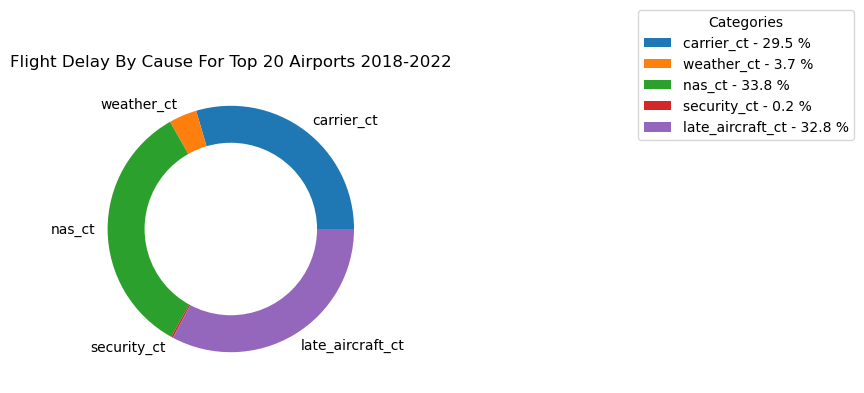

In [31]:

# grouped by the extracted columns by year
pie_chart_df=root_cause_analysis_df.groupby("year").sum()

# dropped unnecessary columns and summed the remaining data by rows 
pie_chart_df=pie_chart_df.drop(columns=["month","arr_flights","arr_del15", '%_on_time_arrivals', '%_delayed_flight','arr_cancelled', 'arr_diverted']).sum(axis=0)

# created data frame of extracted series
pie_chart_df=pd.DataFrame(pie_chart_df).rename(columns={0:"Values"})


# Pie Plot 

# defined labels and values for pie chart
data={'Category':pie_chart_df.index,
   'Values': pie_chart_df.iloc[:,0]}

df = pd.DataFrame(data)

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts, autotexts = ax.pie(df['Values'], labels=df['Category'], autopct='%1.1f%%', pctdistance=0.85,)
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Hide the autopct labels
for autotext in autotexts:
    autotext.set_visible(False)
    
# Create custom labels for the legend with percentage
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(df['Category'], df['Values']/df['Values'].sum()*100)]

# Set the title and legend
ax.set_title('Flight Delay By Cause For Top 20 Airports 2018-2022')
ax.legend(wedges, labels, title='Categories', loc='center left', bbox_to_anchor=(1.8, 1))
plt.show()

In [32]:
rootcause_yearly = root_cause_analysis_df[['year','carrier_ct','weather_ct','nas_ct', 'security_ct', 'late_aircraft_ct']
                                                    ].groupby(['year']).sum()

rootcause_yearly.hvplot.bar(xlabel='Year',ylbael="Flight Delayed",label='Flight Cancellation attributed to airlines for Top 20 Airports from 2018-2022',rot=90,height=500,width=700
                           ).opts(yformatter=formatter)

:Bars   [year,Variable]   (value)

In [33]:
# Weather's Share of the delayed Flights
rt_major_delay_month_df=root_cause_analysis_df[root_cause_analysis_df["month"].isin(major_delay_months_list)]

#created a column by aggregating all non weather related columns of delay.
root_cause_analysis_df["non_weather_ct"] =root_cause_analysis_df[['carrier_ct','nas_ct', 'security_ct', 'late_aircraft_ct']].sum(axis=1)

# generating and displaying plot for Weather's Share of the delayed Flights

root_cause_analysis_df[['month', 'weather_ct','non_weather_ct']].groupby('month').sum(
).hvplot.bar(xlabel="Months",ylabel="Weather & non_Weather related Delays",color=["blue","green"]
             ,rot=90,height=300,width=700,title="Weather Share of Delayed Flights").opts(yformatter=formatter,hover_color='yellow'
                                                                                         ,multi_level=False)

:Bars   [month,Variable]   (value)

In [34]:
# correlation between delay factor

correlation=root_cause_analysis_df[['arr_del15', 'carrier_ct', 'weather_ct',
       'nas_ct', 'security_ct', 'late_aircraft_ct']].corr()

#displaying resulted correlation matrix
correlation


,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
arr_del15,1.000000,0.912330,0.743171,0.901608,0.535762,0.958364
carrier_ct,0.912330,1.000000,0.740193,0.691389,0.568376,0.864554
weather_ct,0.743171,0.740193,1.000000,0.603372,0.402356,0.671868
nas_ct,0.901608,0.691389,0.603372,1.000000,0.395586,0.792625
security_ct,0.535762,0.568376,0.402356,0.395586,1.000000,0.530055
late_aircraft_ct,0.958364,0.864554,0.671868,0.792625,0.530055,1.000000


<Axes: >

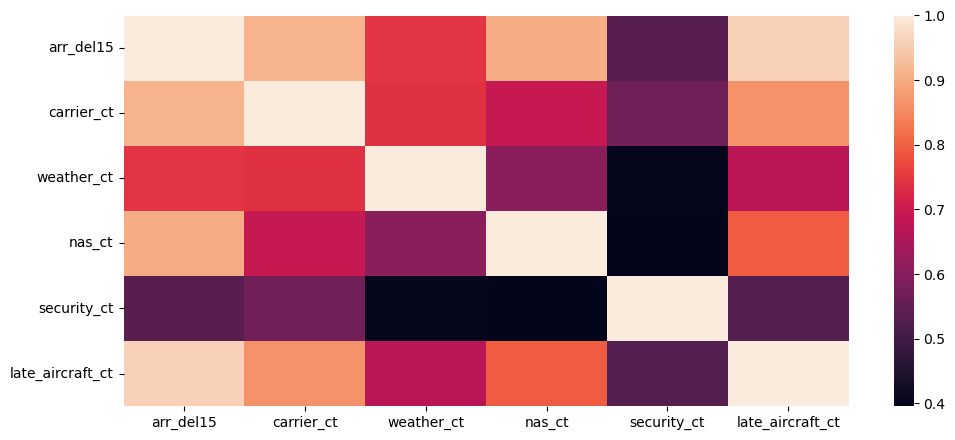

In [35]:
sns.heatmap(correlation)

## GEO MAP FOR TOP 20 AIRPORTS

In [43]:
# joining the latitude and longitude column to existing dataframe for GeoMap

#reading text file containing lattitude and longitude for Top 20 airports
airport_coord = pd.read_csv("top_20_coordinates.txt", sep=" ", header=None, names=["airport",'Lat','Lon'],skiprows=[0])
#airport_coord.head()

#joined newly read csv file with existing dataframe through merge
top_20_with_coord = pd.merge(top_20_total_arrival_df, airport_coord, how="left", on=["airport"])
top_20_with_coord.head(2)

,year,month,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,%_on_time_arrivals,%_delayed_flight,Lat,Lon
0,2022,12,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1691.0,257.0,61.47,6.66,60.43,0.0,128.44,7.0,2.0,84.80,15.20,33.637919,-84.429510
1,2022,12,Endeavor Air Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",216.0,33.0,11.97,0.00,9.52,0.0,11.51,6.0,1.0,84.72,15.28,35.215451,-80.950303


In [45]:
# Geomap where cirscle size represent Total arriving flights and is colored by airport

top_20_geo =top_20_total_arrival_df.groupby("airport").sum()

top_20_geo_map = pd.merge(top_20_geo, airport_coord, how='left', on=["airport"])

top_20_geo_map.hvplot.points(
    "Lon",
    "Lat",
    geo=True,
    size='arr_flights',
    scale=0.1,
    color='airport',
    alpha=0.5,
    tiles='OSM',
    frame_width = 1000,
    frame_height = 700,
    title="Top 20 Airports Based Upon Total  Flights Arrived 2018-2022"
    
    )



,airport,year,month,carrier_name,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,%_on_time_arrivals,%_delayed_flight,Lat,Lon
0,ATL,1735149,5560,Endeavor Air Inc.American Airlines Inc.Alaska ...,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1671588.0,221182.0,67659.14,8876.66,67223.20,492.41,76930.70,24434.0,2891.0,71249.80,14650.20,33.637919,-84.429510
1,BOS,1581692,5076,American Airlines Inc.Alaska Airlines Inc.JetB...,"Boston, MA: Logan InternationalBoston, MA: Log...",599575.0,121971.0,36462.93,3399.51,40942.87,229.27,40936.45,17326.0,742.0,64336.72,13963.28,42.369477,-71.009081
2,CLT,1561442,5045,Endeavor Air Inc.American Airlines Inc.JetBlue...,"Charlotte, NC: Charlotte Douglas International...",1033299.0,148546.0,41852.83,6084.21,39813.22,425.88,60369.89,29048.0,2280.0,63803.69,13496.30,35.215451,-80.950303
3,DCA,1605853,5121,Endeavor Air Inc.American Airlines Inc.Alaska ...,"Washington, DC: Ronald Reagan Washington Natio...",561900.0,99879.0,28560.17,3181.07,31007.99,209.38,36920.59,19093.0,1910.0,66469.21,13030.79,38.854309,-77.040919
4,DEN,1304864,4140,American Airlines Inc.Alaska Airlines Inc.JetB...,"Denver, CO: Denver InternationalDenver, CO: De...",1219270.0,208267.0,69491.54,6718.90,63772.07,421.21,67863.07,31400.0,3396.0,52634.46,11965.54,39.857396,-104.675892
5,DFW,1514959,4848,American Airlines Inc.Alaska Airlines Inc.JetB...,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",1366486.0,249446.0,65498.09,12999.08,79696.99,739.82,90512.03,43437.0,5422.0,60400.02,14599.98,32.898334,-97.040294
6,DTW,1739186,5584,Endeavor Air Inc.American Airlines Inc.Alaska ...,"Detroit, MI: Detroit Metro Wayne CountyDetroit...",683728.0,92666.0,32743.51,5387.68,22130.17,276.86,32127.75,11286.0,736.0,71985.64,14114.36,42.215883,-83.351453
7,EWR,1452298,4615,Endeavor Air Inc.American Airlines Inc.Alaska ...,"Newark, NJ: Newark Liberty InternationalNewark...",568977.0,144400.0,27274.24,3538.44,81287.48,214.20,32085.68,21504.0,2236.0,55463.58,16436.42,40.690175,-74.173433
8,IAH,1476612,4724,American Airlines Inc.Alaska Airlines Inc.JetB...,"Houston, TX: George Bush Intercontinental/Hous...",710507.0,119021.0,33456.45,5861.84,44874.34,184.00,34644.47,15729.0,2092.0,59570.05,13529.95,29.994437,-95.344201
9,JFK,995803,3164,Endeavor Air Inc.American Airlines Inc.Alaska ...,"New York, NY: John F. Kennedy InternationalNew...",533029.0,106208.0,31741.87,2605.21,38555.33,348.48,32956.99,15343.0,1563.0,40051.65,9248.35,40.645920,-73.780219


In [38]:
#GeoMap where each circle represents total delayed flights by that Airport.

top_20_geo_map.hvplot.points(
    'Lon',
    'Lat',
    geo=True,
    size='arr_del15',
    scale=0.1,
    color='airport',
    alpha=0.5,
    tiles='OSM',
    frame_width = 1000,
    frame_height = 700,
    title="Top 20 Airports Based Upon Total  Delayed Flight 2018-2022"
    )

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lon,Lat]   (airport,arr_del15)

## Fast Fact

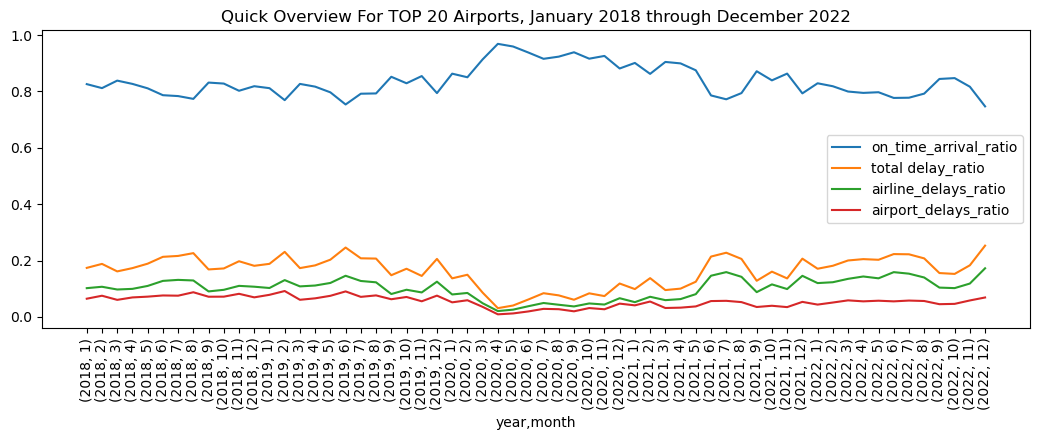

In [39]:
# grouped data from root_cause_analysis_df by year and month
root_cause_analysis_df["airline_delays"]=root_cause_analysis_df[['carrier_ct','late_aircraft_ct']].sum(axis=1)
root_cause_analysis_df["airport_related_delays"]=root_cause_analysis_df[['nas_ct', 'security_ct']].sum(axis=1)

fast_fact_line_chart=root_cause_analysis_df[['year','month',"arr_flights","arr_del15","airline_delays","airport_related_delays"]].groupby(['year','month']).sum()

fast_fact_line_chart["on_time_arrival_ratio"]=(fast_fact_line_chart["arr_flights"]-fast_fact_line_chart["arr_del15"])/fast_fact_line_chart["arr_flights"]
fast_fact_line_chart["total delay_ratio"]=fast_fact_line_chart["arr_del15"]/fast_fact_line_chart["arr_flights"]
fast_fact_line_chart["airline_delays_ratio"]=fast_fact_line_chart["airline_delays"]/fast_fact_line_chart["arr_flights"]
fast_fact_line_chart["airport_delays_ratio"]=fast_fact_line_chart["airport_related_delays"]/fast_fact_line_chart["arr_flights"]



fast_fact_line_chart=fast_fact_line_chart.drop(columns=["arr_flights","arr_del15","airline_delays","airport_related_delays"])
# using rcParams to customize plot display for yearly and monthly structure 
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True

ax = fast_fact_line_chart.plot(title="Quick Overview For TOP 20 Airports, January 2018 through December 2022")

ax.set_xticks(range(len(fast_fact_line_chart)))
ax.set_xticklabels([item for item in fast_fact_line_chart.index.tolist()], # iterated through index of dataframe to label xtickers
rotation=90,ha='center')

plt.show()
